In [1]:
from tensorflow.keras.layers import BatchNormalization
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, concatenate, Flatten
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model

## Test

In [2]:
from tensorflow import keras
print(keras.__version__)

#熱重啟
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
import numpy as np

class SGDRScheduler(Callback):

    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

2.4.0


In [3]:
from tensorflow.keras.layers import BatchNormalization
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, concatenate, Flatten
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model

In [4]:
# import customized VGG19
from keras_model.keras_applications.vgg19 import VGG19
from keras_model.keras_applications.vgg19_2 import VGG19_2

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1b (Conv2D)          (None, 32, 32, 64)   1792        input_2[0][0]                    
_______________________________________________________________________________________

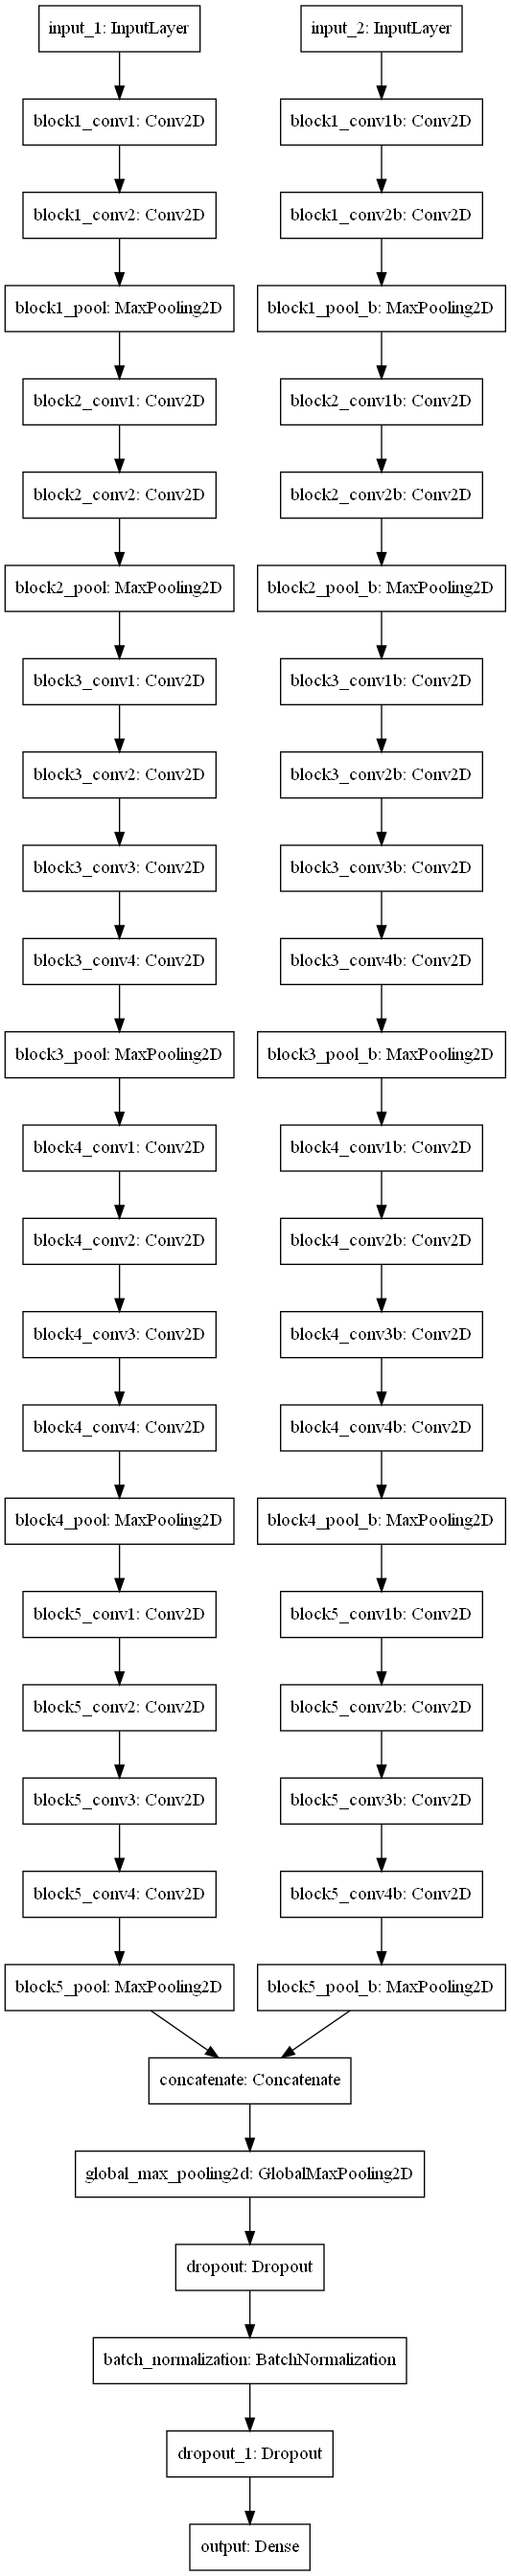

In [5]:
def multi_input_model():
    
    """构建多输入模型"""


    x1 = VGG19(
        weights='imagenet',
        include_top=False,
        input_shape=(32,32,3)
    )
    #gap = layers.GlobalMaxPooling2D()(vgg19)
    
    x2 = VGG19_2(
        weights='imagenet',
        include_top=False,
        input_shape=(32,32,3)
    )
   #gap_2 = layers.GlobalMaxPooling2D()(vgg19_2)
    
 
    x = concatenate([x1.output, x2.output])
    
    gap_2 = layers.GlobalMaxPooling2D()(x)
    drop1_2 = layers.Dropout(0.1)(gap_2)
    batch_2 = BatchNormalization()(drop1_2)
    drop2_2 = layers.Dropout(0.1)(batch_2)
    output_ = Dense(3, activation='softmax', name='output')(drop2_2)
    model = tf.keras.Model(inputs = [x1.input,x2.input], outputs = [output_])
    
    model.summary() 
    return model
 

model = multi_input_model()
plot_model(model, 'C:/Users/ee527/Desktop/model.png')

In [7]:
# load data example

import cv2
import os
import random
import numpy as np


directory_name = r"D:/Dementia_data_processing/new_training_data/bed/1"



bed_data = []
for filename in os.listdir(directory_name):


    img = cv2.imread(directory_name + "/" + filename)
    
    #print(img)
    bed_data.append(img)
    
    #print("------------------------------")

print(len(bed_data))


directory_name = r"D:/Dementia_data_processing/new_training_data/floor/1"
floor_data = []
for filename in os.listdir(directory_name):


    img = cv2.imread(directory_name + "/" + filename)
    
    #print(img)
    floor_data.append(img)
    
    #print("------------------------------")




print(len(floor_data))
label = [[0,0,0],[1,0,0],[1,0,0],[0,1,0]]  

x1 = np.array(bed_data)
x2 = np.array(floor_data)
label = np.array(label)

print(x1.shape)
print(label)



4
4
(4, 32, 32, 3)
[[0 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [9]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',    # one-hot encoded: categorical_crossentropy, others: sparse_categorical_crossentropy
              metrics=['acc']) 

model.fit([x1,x2], label, epochs=10, batch_size=10)

Epoch 1/10
1/1 [==============================] - 0s 757us/step - loss: 1.1135 - acc: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.9005 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 0.7772 - acc: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 0.7717 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 0.7724 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6686 - acc: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 0.8704 - acc: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6174 - acc: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 21ms/step - loss: 0.8033 - acc: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6567 - acc: 0.5000


In [6]:
sgdr = SGDRScheduler( min_lr=1e-5,
                      max_lr=1e-2,
                      steps_per_epoch=np.ceil(train_num/batch_size),
                      lr_decay=0.9,
                      cycle_length=5,
                      mult_factor=1.5)

NameError: name 'train_num' is not defined

In [7]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
patience=25
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

In [8]:
# checkpoint
filepath = "C:\\Users\\ee527\\Desktop\\weights\\{epoch:02d}_{val_acc:.7f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
mode='max')
callbacks_list = [checkpoint]

In [ ]:
from tensorflow.keras import optimizers


model.compile(optimizer='SGD',
              loss='categorical_crossentropy',  
              metrics=['acc']) 

epochs = 50

callbacks_list = [checkpoint,sgdr]

history0 = model.fit([training_set_1,training_set_2],
                    steps_per_epoch=train_num//batch_size,
                    validation_data=[valid_set_1,valid_set_2],
                    epochs=epochs,
                    validation_steps=valid_num//batch_size,
                    callbacks=callbacks_list)

In [ ]:
import matplotlib.pyplot as plt

acc = history0.history['acc']
val_acc = history0.history['val_acc']
loss = history0.history['loss']
val_loss = history0.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
